In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [50]:
df = pd.read_csv("NYPD_Complaint_Data_Historic.tsv", sep="\t", usecols=['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC'])

In [51]:
dt = pd.to_datetime(df['CMPLNT_FR_DT'] + ' ' + df['CMPLNT_FR_TM'])
df.index = pd.DatetimeIndex(dt)
df.drop(['CMPLNT_FR_DT', 'CMPLNT_FR_TM'], inplace=True, axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 458223 entries, 2017-12-23 15:00:00 to 2017-12-23 15:00:00
Data columns (total 1 columns):
OFNS_DESC    458201 non-null object
dtypes: object(1)
memory usage: 5.2+ MB


In [52]:
loc_to_change  = list(df['OFNS_DESC'].value_counts()[17:].index)
df.loc[df['OFNS_DESC'].isin(loc_to_change) , df.columns=='OFNS_DESC'] = 'OTHER'
df['OFNS_DESC'] = pd.Categorical(df['OFNS_DESC'])

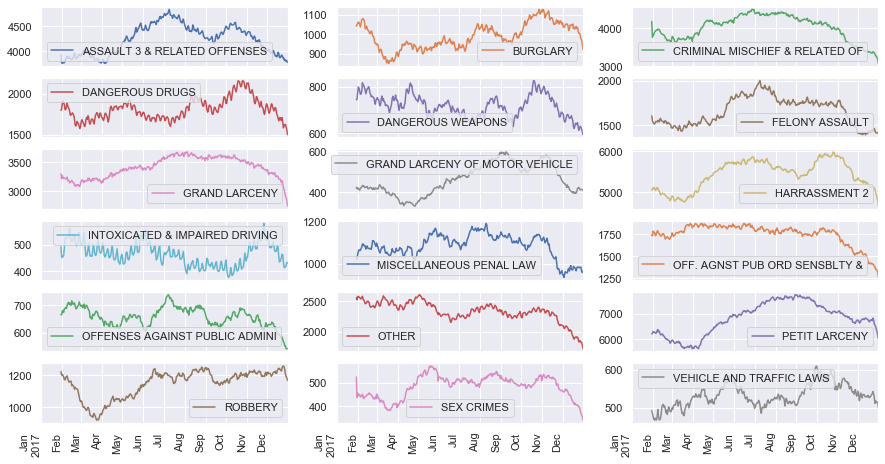

In [53]:
#plot rolling sum for each offense type
month_occ = df.pivot_table(df, aggfunc=np.size, columns='OFNS_DESC', index=df.index.date, fill_value=0)
month_occ.index = pd.DatetimeIndex(month_occ.index)
ax = month_occ.rolling(30).sum().plot(figsize=(15, 8.5), subplots=True, layout=(-1, 3), sharex=True, sharey=False, rot=90)
plt.show()